#Correaltion between PBMS
This study is to see if we can find any similary between LUX, RVE1 and CCA1 PBMs. We are wondering if they might act on the same promoters. Also we can check the presence of 8-mers with high affinity on the promoteres of clock genes.

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plotting', 'array', 'datetime', 'test', 'unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
from pandas import *
from scipy.stats import pearsonr

In [37]:
CCA1 = pandas.read_csv('CCA1_8mers.txt', delimiter='\t')
RVE1 = pandas.read_csv('RVE1_8mers.txt', delimiter='\t')
LUX = pandas.read_excel('LUX_BINDING_PBM.xls',sheetname=1)

In [38]:
print CCA1.head()
print RVE1.head()

      8-mer   8-mer.1  E-score    Median  Z-score
0  AAAAAAAA  TTTTTTTT  0.30529  45366.56   2.0944
1  AAAAAAAC  GTTTTTTT  0.25160  39653.74   0.9978
2  AAAAAAAG  CTTTTTTT  0.28368  47122.61   2.4038
3  AAAAAAAT  ATTTTTTT  0.40163  55772.26   3.7770
4  AAAAAACA  TGTTTTTT  0.31280  44858.79   2.0027
      8-mer   8-mer.1  E-score    Median  Z-score
0  AAAAAAAA  TTTTTTTT  0.21199  70543.36   2.0667
1  AAAAAAAC  GTTTTTTT  0.05058  61813.21   0.4328
2  AAAAAAAG  CTTTTTTT  0.21672  63765.04   0.8173
3  AAAAAAAT  ATTTTTTT  0.40295  78569.43   3.3994
4  AAAAAACA  TGTTTTTT  0.25508  69339.79   1.8539


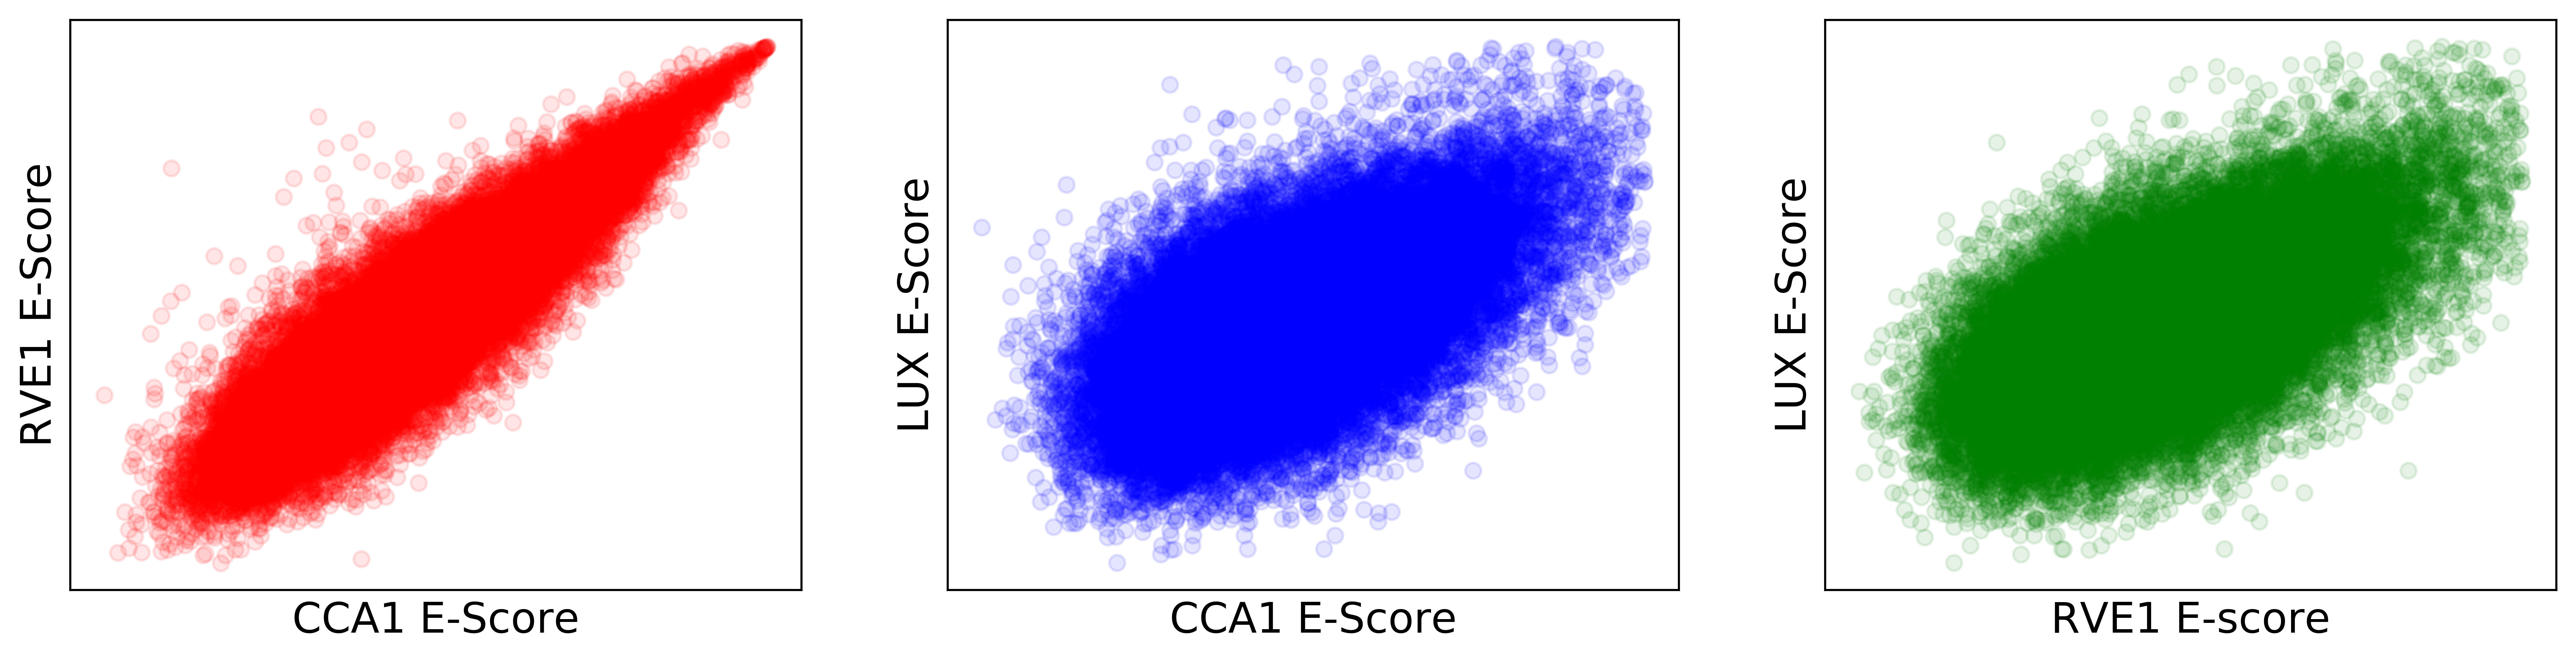

In [39]:
figure(figsize=(17,4), dpi=600)
subplot(131)
scatter(array(CCA1['E-score']),array(RVE1['E-score']),color='red', label='RVE', alpha=0.1)
ylabel('RVE1 E-Score', fontsize=16)
xlabel('CCA1 E-Score', fontsize=16)
yticks([])
xticks([])
subplot(132)
scatter(array(CCA1['E-score']),array(LUX['Design_1_Chamber_1']),color='blue',alpha=0.1)
ylabel('LUX E-Score', fontsize=16)
xlabel('CCA1 E-Score', fontsize=16)
yticks([])
xticks([])
subplot(133)
scatter(array(RVE1['E-score']),array(LUX['Design_1_Chamber_1']),color='green',alpha=0.1)
ylabel('LUX E-Score', fontsize=16)
xlabel('RVE1 E-score', fontsize=16)
yticks([])
xticks([])
savefig('PBM_correlations_RVE1_LUX_CCA1.png', format='png', dpi=600, transparent=True)

(array([  3.,   1.,   1.,   2.,   1.,   2.,   4.,   2.,   3.,   4.,  10.,
          4.,  14.,  19.,  12.,  21.,  27.,  29.,  37.,  29.,  41.,  57.,
         76.,  71.,  82.,  85.,  69., 103., 145., 139., 158., 158., 167.,
        190., 233., 225., 249., 261., 255., 282., 261., 302., 304., 313.,
        332., 320., 306., 283., 312., 306., 299., 296., 303., 265., 263.,
        228., 217., 202., 200., 168., 148., 126., 113., 133.,  87.,  93.,
         78.,  92.,  53.,  59.,  43.,  39.,  27.,  31.,  28.,  20.,  15.,
         16.,  13.,   5.,   9.,   3.,   5.,   5.,   2.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.01984208, -0.01940819, -0.0189743 , -0.01854041, -0.01810653,
        -0.01767264, -0.01723875, -0.01680486, -0.01637097, -0.01593708,
        -0.01550319, -0.0150693 , -0.01463542, -0.01420153, -0.01376764,
        -0.01333375, -0.01289986, -0.01246597, -0.01203208, -0.01159819,
        -0.01116431, -0.01

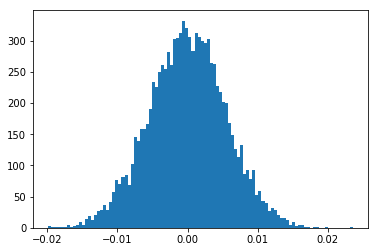

In [40]:
corr = []
r = []
pearsonr(array(CCA1['E-score']),array(RVE1['E-score']))
for i in range(1,10000):
    arr1 = arange(len(array(CCA1['E-score'])))
    random.shuffle(arr1)
    arr2 = arange(len(array(RVE1['E-score'])))
    random.shuffle(arr2)
    p = pearsonr(array(CCA1['E-score'])[arr1],array(RVE1['E-score'])[arr2])
    corr.append(p[0])
    r.append(p[1])
hist(corr, bins=100)

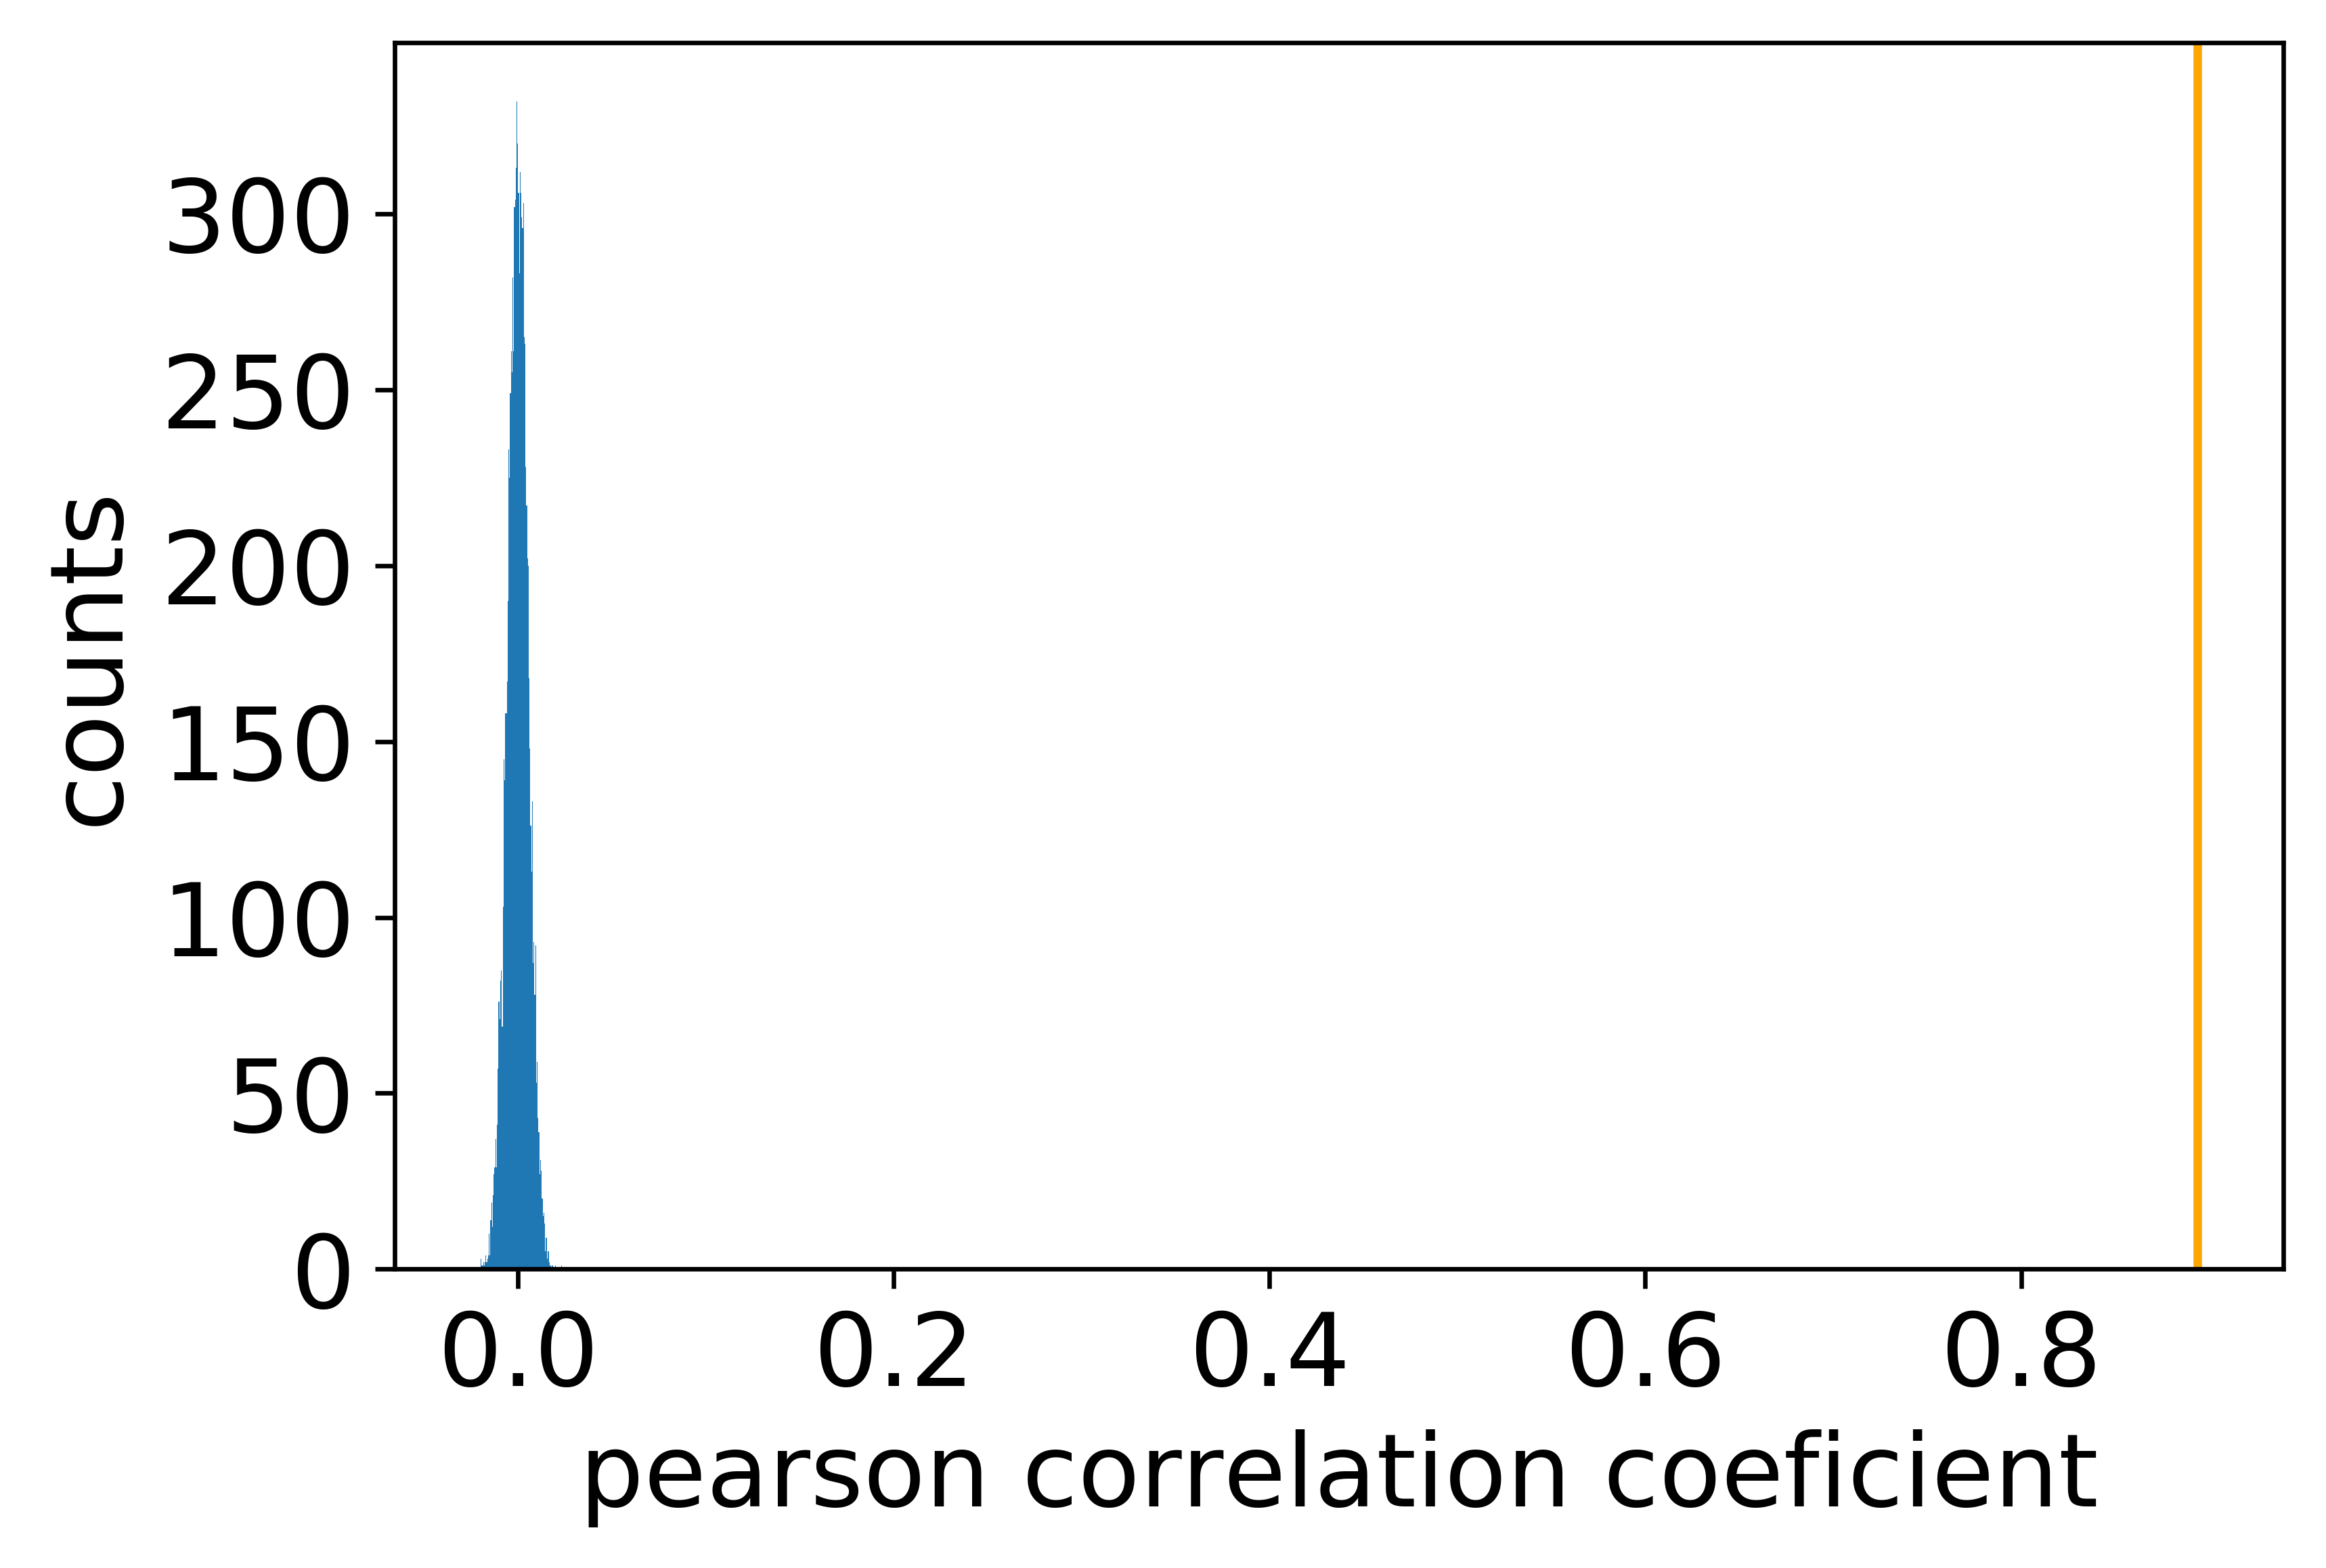

In [41]:
figure(dpi=600)
hist(corr, bins=100)
axvline(pearsonr(array(CCA1['E-score']),array(RVE1['E-score']))[0], color='orange')
xlabel('pearson correlation coeficient', fontsize=18)
ylabel('counts', fontsize=18)
yticks(fontsize=18)
xticks(fontsize=18)
savefig('peasons_signifiance.png', format='png',dpi=600, transparent='True' )

In [42]:
pearsonr(array(CCA1['E-score']),array(RVE1['E-score']))

(0.8939274880049254, 0.0)

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   3.,
          4.,   4.,   1.,   5.,   4.,   7.,   5.,   8.,   9.,  12.,  22.,
         20.,  20.,  23.,  36.,  46.,  44.,  66.,  68.,  77.,  90., 113.,
        120., 103., 140., 170., 167., 173., 192., 204., 239., 248., 259.,
        269., 268., 310., 299., 299., 316., 307., 298., 318., 314., 300.,
        288., 288., 296., 301., 244., 233., 227., 224., 174., 196., 184.,
        144., 157., 134., 128., 103.,  89.,  70.,  70.,  74.,  71.,  45.,
         37.,  33.,  31.,  35.,  17.,  23.,  13.,  11.,  17.,   5.,   8.,
          7.,   4.,   6.,   0.,   1.,   0.,   1.,   2.,   1.,   1.,   0.,
          2.]),
 array([-2.25451386e-02, -2.21114218e-02, -2.16777050e-02, -2.12439882e-02,
        -2.08102713e-02, -2.03765545e-02, -1.99428377e-02, -1.95091209e-02,
        -1.90754041e-02, -1.86416873e-02, -1.82079704e-02, -1.77742536e-02,
        -1.73405368e-02, -1.69068200e-02, -1.64731032e-02, -1.60393864e-02,
        -1.560

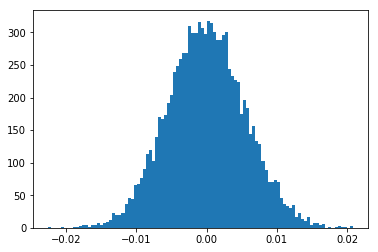

In [43]:
corr = []
r = []
for i in range(1,10000):
    arr1 = arange(len(array(RVE1['E-score'])))
    random.shuffle(arr1)
    arr2 = arange(len(array(LUX['Design_1_Chamber_1'])))
    random.shuffle(arr2)
    p = pearsonr(array(RVE1['E-score'])[arr1],array(LUX['Design_1_Chamber_1'])[arr2])
    corr.append(p[0])
    r.append(p[1])
hist(corr, bins=100)

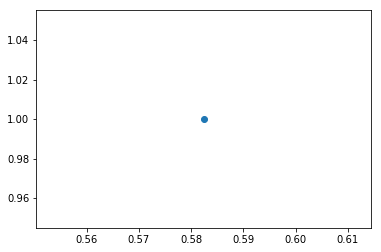

In [44]:
plot(pearsonr(array(CCA1['E-score']),array(LUX['Design_1_Chamber_1']))[0],1,'o')

In [45]:
pearsonr(array(RVE1['E-score']),array(LUX['Design_1_Chamber_1']))

(0.608829978113948, 0.0)

In [46]:
pearsonr(array(CCA1['E-score']),array(LUX['Design_1_Chamber_1']))

(0.5824219662923817, 0.0)

(0.5824219662923817, 0.0)

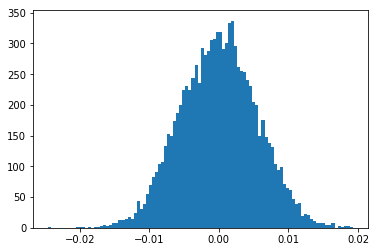

In [47]:
corr = []
r = []
for i in range(1,10000):
    arr1 = arange(len(array(CCA1['E-score'])))
    random.shuffle(arr1)
    arr2 = arange(len(array(LUX['Design_1_Chamber_1'])))
    random.shuffle(arr2)
    p = pearsonr(array(CCA1['E-score'])[arr1],array(LUX['Design_1_Chamber_1'])[arr2])
    corr.append(p[0])
    r.append(p[1])
hist(corr, bins=100)
pearsonr(array(CCA1['E-score']),array(LUX['Design_1_Chamber_1']))

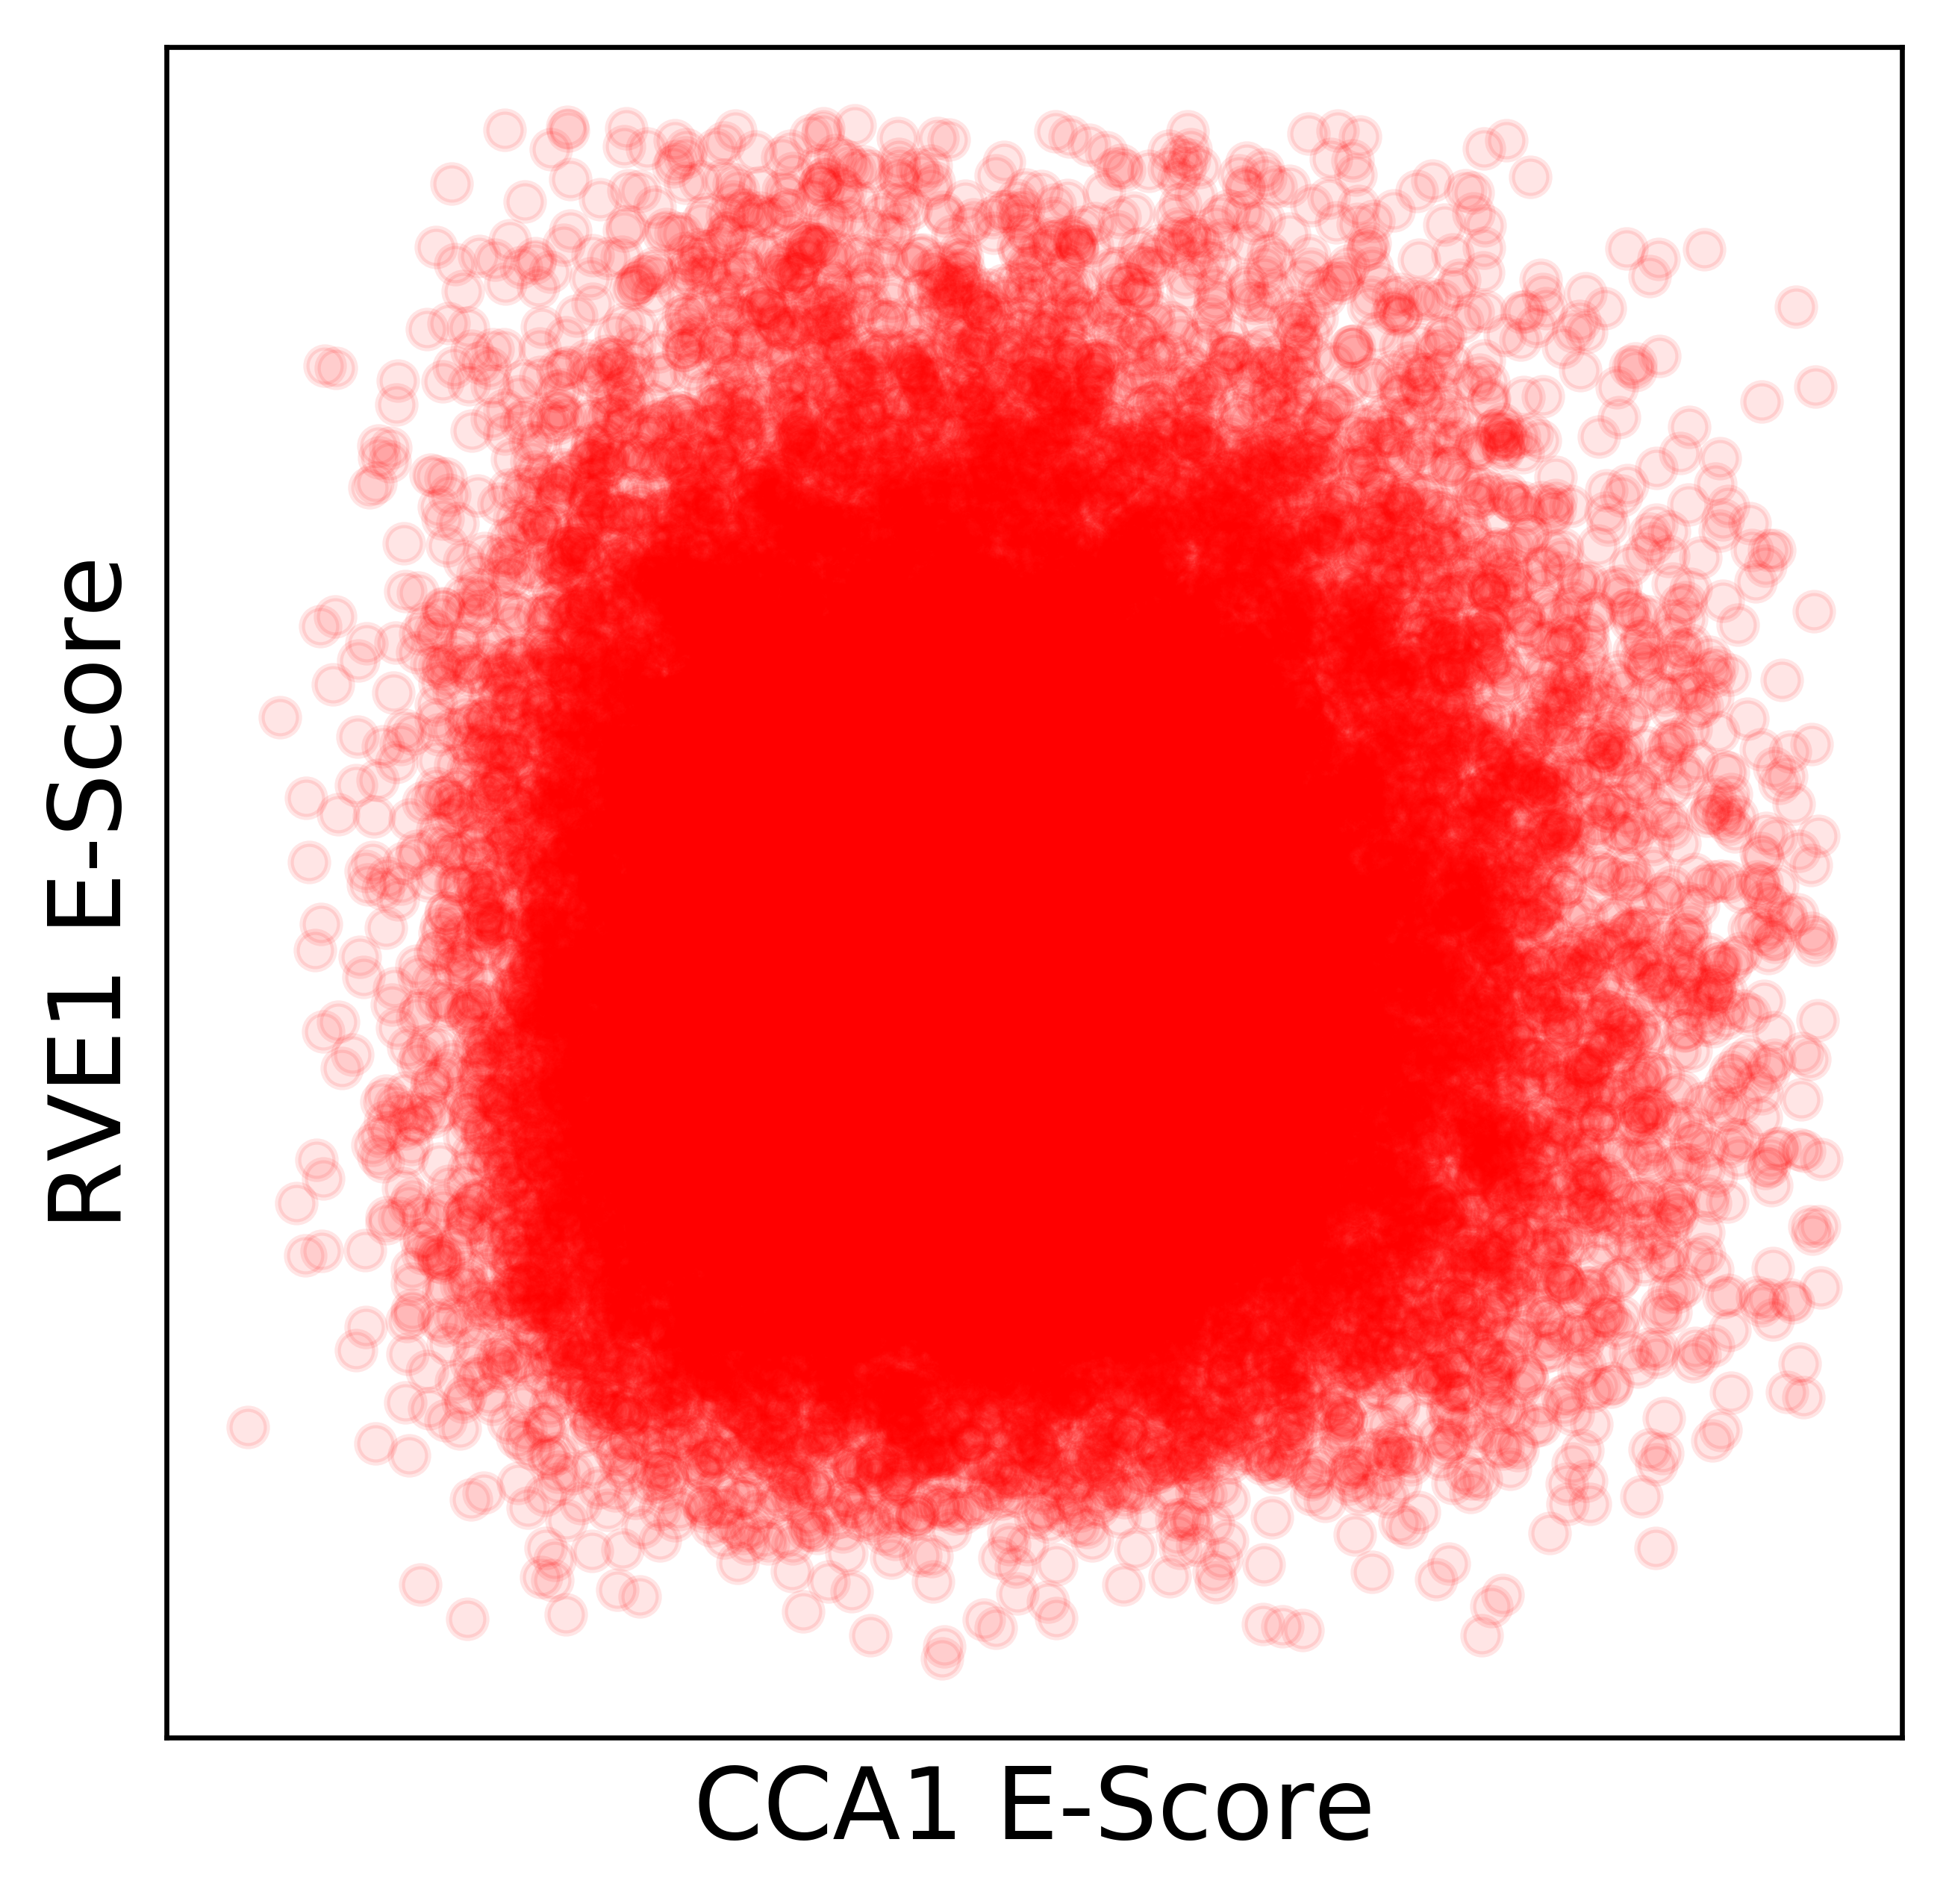

In [48]:
figure(figsize=(5,5), dpi=600)
scatter(array(CCA1['E-score'])[arr1],array(RVE1['E-score'])[arr2],color='red', label='RVE', alpha=0.1)
ylabel('RVE1 E-Score', fontsize=16)
xlabel('CCA1 E-Score', fontsize=16)
yticks([])
xticks([])
savefig('random_CCA1_vs_RVE1.png', format='png', dpi=600, transparent=True)